In [2]:
import pandas as pd

#load the dataset
students_data=pd.read_csv('StudentsPerformance.csv')
#display first 5 rows
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [3]:
#check for missing values
missing_values=students_data.isnull().sum()
print("Missing Values Summary : ")
print(missing_values)

Missing Values Summary : 
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64


In [4]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [5]:
#math score should be numeric but its datatype is object 
#convert math score to numeric to check for inconsistencies
students_data['math score']=pd.to_numeric(students_data['math score'], errors='coerce')

In [6]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   957 non-null    float64
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#check for missing values
missing_values=students_data.isnull().sum()
print("Missing Values Summary : ")
print(missing_values)

Missing Values Summary : 
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64


In [8]:
#need to fill the missing values 
#fill the missing values with median for numeric columns
numeric_columns=['math score','reading score','writing score']
for column in numeric_columns:
    students_data[column]=students_data[column].fillna(students_data[column].median())

In [9]:
students_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize math score
scaler = MinMaxScaler()
students_data['math score (normalized)'] = scaler.fit_transform(students_data[['math score']])

# Check transformation
students_data[['math score', 'math score (normalized)']].head()


,math score,math score (normalized)
0,72.0,0.380615
1,69.0,0.373522
2,90.0,0.423168
3,47.0,0.321513
4,76.0,0.390071


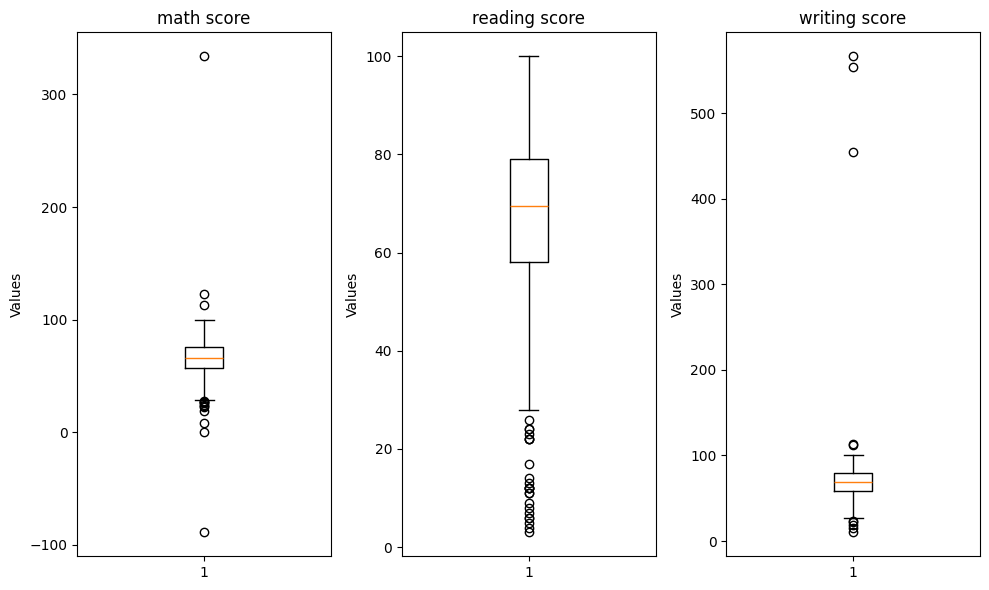

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize numeric columns to identify outliers 
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    plt.boxplot(students_data[col])
    plt.title(col)
    plt.ylabel('Values')
plt.tight_layout()
plt.show()


In [12]:
#Outliers capping
for column in numeric_columns:
    q1 = students_data[column].quantile(0.25)
    q3 = students_data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    students_data[column] = students_data[column].clip(lower=lower_bound, upper=upper_bound)

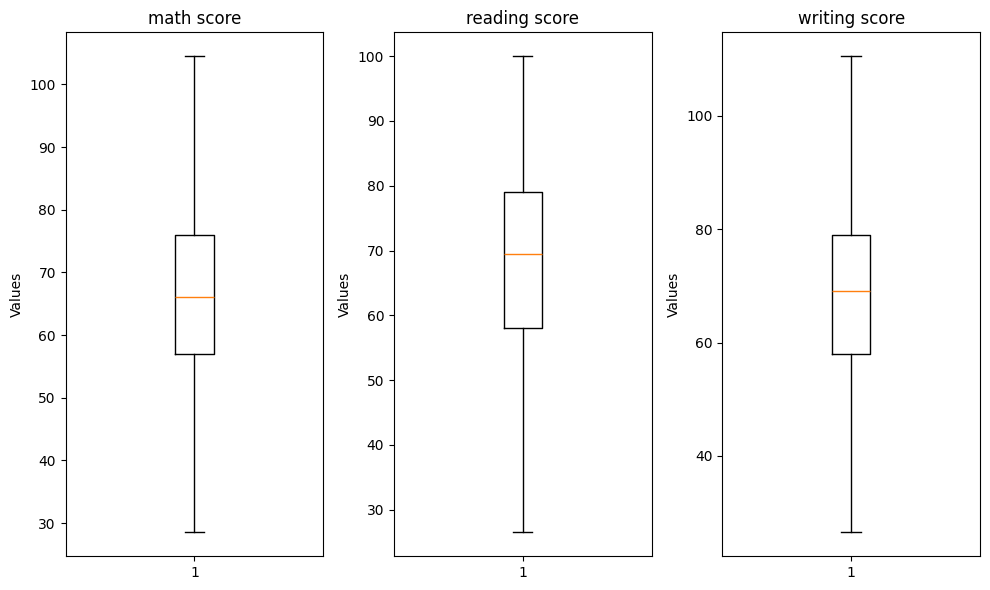

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize numeric columns to identify outliers 
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    plt.boxplot(students_data[col])
    plt.title(col)
    plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [14]:
#replace -ve values with 0
students_data['math score'] = students_data['math score'].apply(lambda x: max(x, 0))
students_data['reading score'] = students_data['reading score'].apply(lambda x: max(x, 0))
students_data['writing score'] = students_data['writing score'].apply(lambda x: max(x, 0))
